In [1]:
import pandas as pd

In [2]:
jan= pd.read_csv('output_data1_jan.csv')
feb = pd.read_csv('output_data2_feb.csv')
mar = pd.read_csv('output_data3_mar.csv')
apr = pd.read_csv('output_data8c_apr.csv')
may = pd.read_csv('output_data11a_may.csv')
june = pd.read_csv('output_data11c_june.csv')
july = pd.read_csv('output_data_july1.csv')
aug = pd.read_csv('output_main_data_aug1.csv')
sept = pd.read_csv('output_main_data_sept1.csv')
oct = pd.read_csv('output_data_oct2.csv')

In [3]:
merge_data = pd.concat([jan,feb,mar,apr,may,june,july,aug,sept,oct])

In [4]:
merge_data = merge_data.reset_index(drop = True)

In [5]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099554 entries, 0 to 4099553
Data columns (total 3 columns):
Date    object
id      float64
text    object
dtypes: float64(1), object(2)
memory usage: 93.8+ MB


In [6]:
merge_data['Date'] = pd.to_datetime(pd.Series(merge_data['Date']))

In [7]:
import pandas as pd
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from PIL import Image
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def remove_url(row):
    txt = str(row['text']).split('https')[0]
    return txt

In [9]:
merge_data['tidy_text'] = merge_data.apply(remove_url, axis = 1)

In [10]:
merge_data['tidy_text'] = merge_data['text'].str.replace('@[\w:]*','').str.replace('ud83eudd14',"")

In [11]:
data = merge_data

In [12]:
data['tidy_text'] = data['tidy_text'].str.replace("RT ", '').str.replace('u201d','').str.replace('nn','').str.replace('amp','mental')
data['tidy_text'] = data['tidy_text'].str.replace('\\','').str.replace('u201c','').str.replace('nu2019t','')
data = data[~data['tidy_text'].astype(str).str.startswith('u')]
data = data[~data['tidy_text'].astype(str).str.contains('ud')]
data = data[~data['tidy_text'].astype(str).str.contains('#')]

In [13]:
data['tidy_text'] = data['tidy_text'].apply(str)

In [14]:
data = data.reset_index(drop = True)

In [15]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742785 entries, 0 to 2742784
Data columns (total 5 columns):
Date         datetime64[ns]
id           float64
text         object
tidy_text    object
month        int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 104.6+ MB


In [17]:
data['tidy_text'] = data['tidy_text'].apply(lambda x: x.lower())

In [18]:
data['month'] = data['month'].replace(1,'Jan').replace(2,'Feb').replace(3,'Mar').replace(4,'Apr').replace(5,'May').replace(6,'June').replace(7,'July').replace(8,'Aug').replace(9,'Sept').replace(10,'Oct')

In [19]:
data.head()

,Date,id,text,tidy_text,month
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,the frieman scary scale makes its debut. wu...,Jan
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,genome sequence of the new coronavirus associ...,Jan
2,2020-01-11,1.215840e+18,Crap,crap,Jan
3,2020-01-11,1.215850e+18,.@hayesluk summarises novel coronavirus lab f...,. summarises novel coronavirus lab findings; ...,Jan
4,2020-01-11,1.215910e+18,China reports 1st death from 'new type of cor...,china reports 1st death from 'new type of cor...,Jan


In [20]:
#data.to_csv('combined_data.csv', index_label = False)

In [21]:
frequency = data['month'].value_counts()

In [22]:
new_freq = pd.DataFrame(frequency)

In [23]:
new_freq.reset_index(inplace = True)

In [24]:
new_freq.columns = ['date','frequency']

In [25]:
new_freq

,date,frequency
0,Apr,479320
1,Mar,446486
2,Feb,408884
3,Jan,403684
4,June,207150
5,Sept,205845
6,May,192861
7,Oct,166032
8,Aug,138677
9,July,93846


In [26]:
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Tweet Frequency')

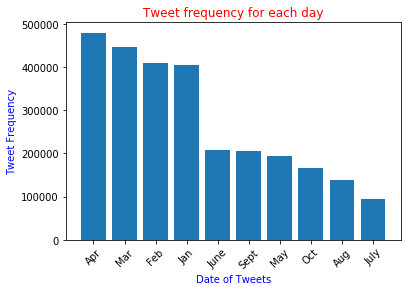

In [27]:
plt.bar(x = new_freq.date, height= new_freq.frequency)
plt.xticks(rotation = 45)
plt.title('Tweet frequency for each day', color = 'red')
plt.xlabel('Date of Tweets', color = 'blue')
plt.ylabel('Tweet Frequency',color = 'blue')

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
data['tidy_text'] = data['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
data['tidy_text'] = data['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)> 4]))

In [30]:
data['tidy_text'] = data['tidy_text'].str.replace('wYxJPGnXe0','').str.replace('onl','').str.replace('KEY','').str.replace('https','').str.replace('VID','')
data = data[~data['tidy_text'].astype(str).str.contains('://')]

In [31]:
data = data[~data['tidy_text'].astype(str).str.startswith('u')]
data['tidy_text']=data['tidy_text'].replace(['u2019d','u201d','u00eda','u00f3n','u2026'],"",regex = True)

In [32]:
data = data.reset_index(drop = True)

In [33]:
data.count()

Date         1409754
id           1409754
text         1409754
tidy_text    1409754
month        1409754
dtype: int64

In [34]:
all_words = ' '.join([w for w in data['tidy_text']])

In [35]:
len(all_words)

63424231

In [36]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110,background_color = 'black').generate(all_words)

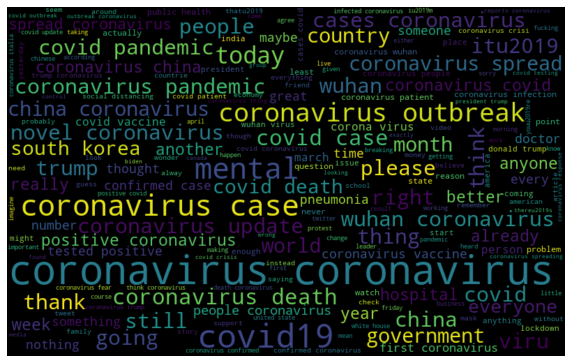

In [37]:
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [38]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

In [39]:
sid = SentimentIntensityAnalyzer()

In [40]:
scores = [sid.polarity_scores(i) for i in data.tidy_text]

In [41]:
df1 = pd.DataFrame(scores)

In [42]:
df1.count()

neg         1409754
neu         1409754
pos         1409754
compound    1409754
dtype: int64

In [43]:
data_copy = data

In [44]:
covid_mentalhealth = pd.concat([data_copy,df1], axis = 1)

In [45]:
covid_mentalhealth.head()

,Date,id,text,tidy_text,month,neg,neu,pos,compound
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,frieman scary scale makes debut. wuhan coronav...,Jan,0.286,0.714,0.0,-0.4939
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,genome sequence coronavirus associated pneumon...,Jan,0.000,1.000,0.0,0.0000
2,2020-01-11,1.215840e+18,Crap,,Jan,0.000,0.000,0.0,0.0000
3,2020-01-11,1.216130e+18,China releases genetic data on new coronavirus,china releases genetic coronavirus,Jan,0.000,1.000,0.0,0.0000
4,2020-01-12,1.216500e+18,China's mystery 'coronavirus' isn't currently...,china's mystery 'coronavirus' currently spreading,Jan,0.000,1.000,0.0,0.0000


In [46]:
conditions = [(covid_mentalhealth['compound']>=0.05),(covid_mentalhealth['compound']<= - 0.05),(covid_mentalhealth['compound'] > -0.05) & (covid_mentalhealth['compound'] < 0.05)]
values = ['Positive', 'Negative','Neutral']
covid_mentalhealth['sentiments'] = np.select(conditions,values)

In [47]:
covid_mentalhealth.head()

,Date,id,text,tidy_text,month,neg,neu,pos,compound,sentiments
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,frieman scary scale makes debut. wuhan coronav...,Jan,0.286,0.714,0.0,-0.4939,Negative
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,genome sequence coronavirus associated pneumon...,Jan,0.000,1.000,0.0,0.0000,Neutral
2,2020-01-11,1.215840e+18,Crap,,Jan,0.000,0.000,0.0,0.0000,Neutral
3,2020-01-11,1.216130e+18,China releases genetic data on new coronavirus,china releases genetic coronavirus,Jan,0.000,1.000,0.0,0.0000,Neutral
4,2020-01-12,1.216500e+18,China's mystery 'coronavirus' isn't currently...,china's mystery 'coronavirus' currently spreading,Jan,0.000,1.000,0.0,0.0000,Neutral


In [48]:
c1 = (covid_mentalhealth['sentiments']=='Neutral')
c2 = (covid_mentalhealth['sentiments'] == 'Positive')
c3 = (covid_mentalhealth['sentiments'] == 'Negative') 

covid_mentalhealth['target'] = np.select([c1,c2,c3],[1,2,3],default = 'Other')

In [49]:
covid_mentalhealth.head()

,Date,id,text,tidy_text,month,neg,neu,pos,compound,sentiments,target
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,frieman scary scale makes debut. wuhan coronav...,Jan,0.286,0.714,0.0,-0.4939,Negative,3
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,genome sequence coronavirus associated pneumon...,Jan,0.000,1.000,0.0,0.0000,Neutral,1
2,2020-01-11,1.215840e+18,Crap,,Jan,0.000,0.000,0.0,0.0000,Neutral,1
3,2020-01-11,1.216130e+18,China releases genetic data on new coronavirus,china releases genetic coronavirus,Jan,0.000,1.000,0.0,0.0000,Neutral,1
4,2020-01-12,1.216500e+18,China's mystery 'coronavirus' isn't currently...,china's mystery 'coronavirus' currently spreading,Jan,0.000,1.000,0.0,0.0000,Neutral,1


In [50]:
covid_mentalhealth['sentiments'].value_counts()

Neutral     911206
Negative    275970
Positive    222578
Name: sentiments, dtype: int64

In [51]:
sentiment_freq = pd.DataFrame(covid_mentalhealth['sentiments'].value_counts())

In [52]:
sentiment_freq.reset_index(inplace = True)

In [53]:
sentiment_freq.columns = ['sentiments','frequency']

Text(0, 0.5, 'Tweet_frequency')

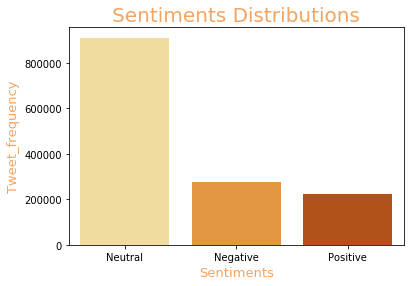

In [54]:
sns.barplot(x = 'sentiments', y = 'frequency', data = sentiment_freq, palette = "YlOrBr")
plt.title('Sentiments Distributions',fontsize= 20, color = 'sandybrown')
plt.xlabel('Sentiments',fontsize = 13, color = 'sandybrown')
plt.ylabel('Tweet_frequency', fontsize = 13,color = 'sandybrown' )

In [55]:
df= covid_mentalhealth

In [56]:
df = df[['tidy_text','sentiments']]

In [57]:
xwords = pd.Series(['coronavirus','wuhan','itu2019s','iu2019m','yu2019all','virus','china','people','chinese','think','pneumonia','covid19','covid','italy','country','pandemic','mental','south','korea','outbreak','spread','trump',])

In [58]:
banned_words = set(word.strip().lower() for word in xwords)

In [59]:
def delete_banned_words(matchobj):
    word = matchobj.group(0)
    if word.lower() in banned_words:
        return ""
    else:
        return word

In [60]:
word_pattern = re.compile('\w+')

In [61]:
df['tidy_text'] = [word_pattern.sub(delete_banned_words,sentence) for sentence in df['tidy_text']]

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output


import collections
import nltk
from keras.preprocessing import sequence
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [63]:
train, test = train_test_split(df,test_size = 0.3)

# Removing neutral sentiments
train = train[train.sentiments != "Neutral"]
test = test[test.sentiments != 'Neutral']

In [64]:
train.head()

,tidy_text,sentiments
113305,please god... vaccinate fucking crotch goblins...,Positive
436463,yeah. we're third affected .. getting crazy,Negative
1331360,seeks avoid national lockdown unemployment mil...,Negative
593145,march break! can't messing teacher's vacations...,Negative
923736,positive cases -19 state.,Positive


In [65]:
train_pos = train[ train['sentiments'] == 'Positive']
train_pos = train_pos['tidy_text']
train_neg = train[ train['sentiments'] == 'Negative']
train_neg = train_neg['tidy_text']

Positive words


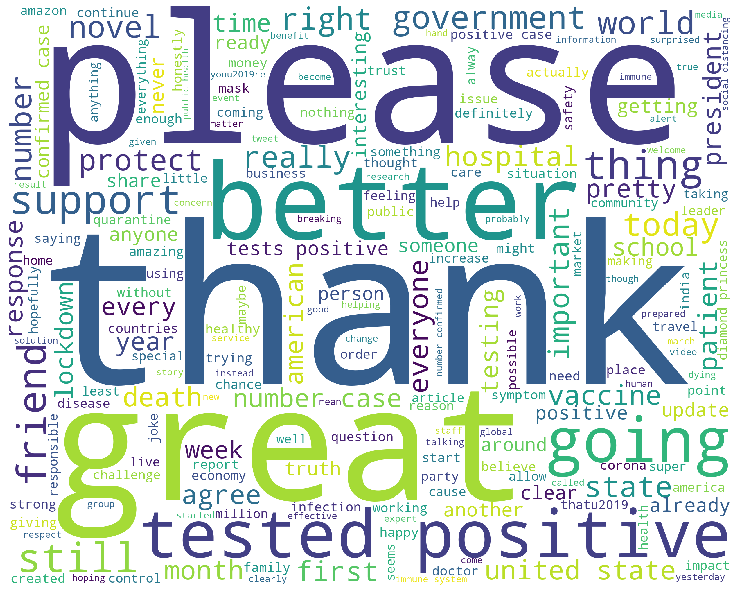

Negative words


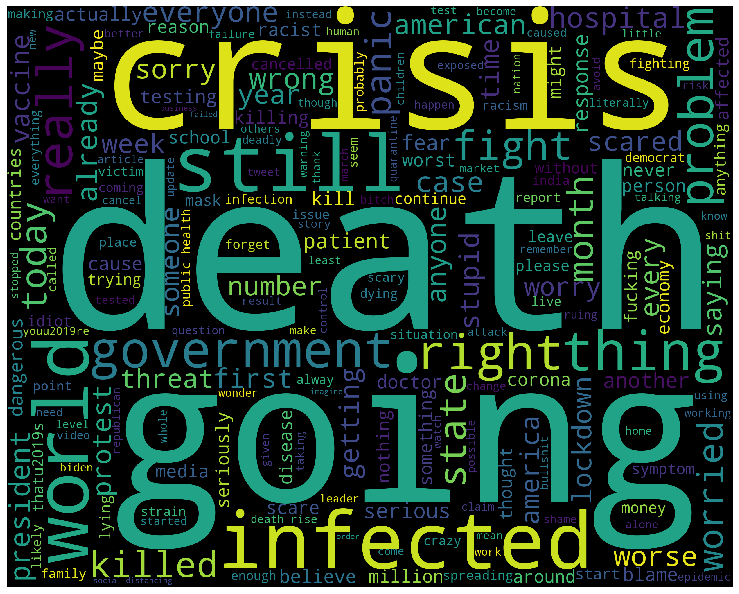

In [66]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                          width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [67]:
df2= covid_mentalhealth

In [68]:
df2.target = df2.target.astype('int')

In [69]:
train, test = train_test_split(df2,test_size = 0.3)

In [70]:
def feature_gen(f):
    maxlen=0
    word_freqs=collections.Counter()
    num_recs=0

    for line in f:
        words=nltk.word_tokenize(str(line).lower())
        if len(words)>maxlen:
            maxlen=len(words)
        for word in words:
            word_freqs[word] +=1
        num_recs +=1

    MAX_FEATURES=17000
    MAX_SENTENCE_LENGTH =50
    #La entrada para la RNN son palabras indexadas con su numero de frecuencia en el documento, ademas consideramos 2 etiquetas para palabras que no se encuentran en el corpus
    #vocab_size = min(MAX_FEATURES, len(word_freqs))+2
    word2index = {x[0]: i+2 for i,x in enumerate(word_freqs.most_common(MAX_FEATURES))}
    word2index["PAD"]=0
    word2index["UNK"]=1
    #index2word={v:k for k, v in word2index.items()}
    #Preparamos nuestros datos para darlos como entrada en la RNN
    X=np.empty((num_recs,),dtype=list)
    train = f
    i=0
    for line in train:
        words=nltk.word_tokenize(str(line).lower())
        seqs=[]
        for word in words:
            if word in word2index:
                #print(word)
                #print(word2index[word])
                seqs.append(word2index[word])
            else:
                seqs.append(word2index["UNK"])
        #print(i)
        #print(seqs)
        X[i]=seqs
        i += 1
    X=sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)
    #print(type(X))
    #print(X.size)
    return X, word_freqs

In [71]:
f= train.tidy_text
Xtrain, word_freqs = feature_gen(f)
#y1 = train.target

f= test.tidy_text
Xtest, word_freqs = feature_gen(f)

y_train = train.target
y_test = test.target

In [72]:
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


model_factory = [
 RandomForestRegressor(),
 XGBRegressor(nthread=1),
 #MLPRegressor(),
 Ridge(),
 BayesianRidge(),
 ExtraTreesRegressor(),
 ElasticNet(),
 KNeighborsRegressor(),
 GradientBoostingRegressor()
]

for model in model_factory:
    model.seed = 42
    num_folds = 3

    scores = cross_val_score(model, Xtrain, y_train, cv=num_folds, scoring='neg_mean_squared_error')
    score_description = " %0.2f (+/- %0.2f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-5 RMSE: {score}'.format(model=model.__class__.__name__,score=score_description))

RandomForestRegressor     CV-5 RMSE:  0.62 (+/- 0.00)
XGBRegressor              CV-5 RMSE:  0.62 (+/- 0.00)
Ridge                     CV-5 RMSE:  0.78 (+/- 0.00)
BayesianRidge             CV-5 RMSE:  0.78 (+/- 0.00)
ExtraTreesRegressor       CV-5 RMSE:  0.61 (+/- 0.00)
ElasticNet                CV-5 RMSE:  0.78 (+/- 0.00)
KNeighborsRegressor       CV-5 RMSE:  0.70 (+/- 0.00)
GradientBoostingRegressor CV-5 RMSE:  0.69 (+/- 0.00)


In [73]:
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin

class PseudoLabeler(BaseEstimator, RegressorMixin):
    '''
    Sci-kit learn wrapper for creating pseudo-lebeled estimators.
    '''
    
    #def __init__(self, model, unlabled_data, features, target, sample_rate=0.2, seed=42):
    def __init__(self, model, unlabled_data, target, sample_rate=0.2, seed=42):    
        '''
        @sample_rate - percent of samples used as pseudo-labelled data
                       from the unlabled dataset
        '''
        assert sample_rate <= 1.0, 'Sample_rate should be between 0.0 and 1.0.'
        
        self.sample_rate = sample_rate
        self.seed = seed
        self.model = model
        self.model.seed = seed
        
        self.unlabled_data = unlabled_data
        #self.features = features
        self.target = target
        
    def get_params(self, deep=True):
        return {
            "sample_rate": self.sample_rate,
            "seed": self.seed,
            "model": self.model,
            "unlabled_data": self.unlabled_data,
            #"features": self.features,
            "target": self.target
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

        
    def fit(self, X, y):
        '''
        Fit the data using pseudo labeling.
        '''

        augemented_train = self.__create_augmented_train(X, y)
        self.model.fit(
            #augemented_train[self.features],
            #augemented_train[self.target]
            augemented_train.iloc[:,:-1],
            augemented_train.iloc[:,-1]
        )
        
        return self


    def __create_augmented_train(self, X, y):
        '''
        Create and return the augmented_train set that consists
        of pseudo-labeled and labeled data.
        '''        
        num_of_samples = int(len(self.unlabled_data) * self.sample_rate)
        
        # Train the model and creat the pseudo-labels
        self.model.fit(X, np.ravel(y))
        #pseudo_labels = self.model.predict(self.unlabled_data[self.features])
        pseudo_labels = self.model.predict(self.unlabled_data)
        
        # Add the pseudo-labels to the test set
        #pseudo_data = self.unlabled_data.copy(deep=True)
        pseudo_data = self.unlabled_data
        #pseudo_data[self.target] = pseudo_labels
        #pseudo_data = pd.concat([pd.DataFrame(data=pseudo_data), pd.DataFrame(data=pseudo_labels)], axis=1)
        pseudo_data = np.concatenate((pseudo_data, pseudo_labels.reshape(-1,1)), axis=1)
        # Take a subset of the test set with pseudo-labels and append in onto
        # the training set
        sampled_pseudo_data = pd.DataFrame(data=pseudo_data).sample(n=num_of_samples)
        #temp_train = pd.concat([pd.DataFrame(data=X), pd.DataFrame(data=y)], axis=1)
        #temp_train = pd.concat([X, y], axis=1)
        temp_train = np.concatenate((X, y.to_numpy().reshape(-1,1)), axis=1)
        temp_train = pd.DataFrame(data=temp_train)
        augemented_train = pd.concat([sampled_pseudo_data, temp_train])
        #augemented_train = np.concatenate((sampled_pseudo_data, temp_train), axis=0)
        #augemented_train = pd.DataFrame(data=augemented_train)
        return shuffle(augemented_train)
        
    def predict(self, X):
        '''
        Returns the predicted values.
        '''
        return self.model.predict(X)
    
    def get_model_name(self):
        return self.model.__class__.__name__

In [ ]:
Xtrain = pd.DataFrame(data=Xtrain)
y_train = pd.DataFrame(data=y_train)

Xtest = pd.DataFrame(data=Xtest)
y_test = pd.DataFrame(data=y_test)

model = PseudoLabeler(
    XGBRegressor(nthread=1),
    Xtest,
    #features,
    #target,
    y_test,
    sample_rate = 0.3
)

model.fit(Xtrain, y_train)
pred = model.predict(Xtest)
cross_val_score(model, Xtrain, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
#cross_val_score(model, Xtrain, y_train, cv=num_folds, scoring='neg_mean_squared_error')


model_factory = [
    XGBRegressor(nthread=1),
    
    PseudoLabeler(
        XGBRegressor(nthread=1),
        Xtest,
        #features,
        #target,
        y_test,
        sample_rate=0.3
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 8
    
    scores = cross_val_score(model, Xtrain, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    #scores = cross_val_score(model, Xtrain, y_train, cv=num_folds, scoring='neg_mean_squared_error')
    score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))



sample_rates = np.linspace(0, 1, 10)

def pseudo_label_wrapper(model):
    return PseudoLabeler(model, Xtest, y_test) #features, target)

# List of all models to test
model_factory = [
    RandomForestRegressor(n_jobs=1),
    XGBRegressor(),
]

# Apply the PseudoLabeler class to each model
model_factory = map(pseudo_label_wrapper, model_factory)

# Train each model with different sample rates
results = {}
num_folds = 5

for model in model_factory:
    model_name = model.get_model_name()
    print('%s' % model_name)

    results[model_name] = list()
    for sample_rate in sample_rates:
        model.sample_rate = sample_rate
        
        # Calculate the CV-3 R2 score and store it
        scores = cross_val_score(model, Xtrain, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
        #scores = cross_val_score(model, Xtrain, y_train, cv=num_folds, scoring='neg_mean_squared_error')
        results[model_name].append(np.sqrt(scores.mean()*-1))


print(results)

In [ ]:
plt.figure(figsize=(16, 18))

i = 1
for model_name, performance in results.items():    
    plt.subplot(3, 3, i)
    i += 1
    
    plt.plot(sample_rates, performance)
    plt.title(model_name)
    plt.xlabel('sample_rate')
    plt.ylabel('RMSE')
    

plt.show()
